In [13]:
from signver.extractor import MetricExtractor
from signver.detector import Detector
from signver.utils import data_utils, visualization_utils
from signver.utils.data_utils import invert_img
from signver.utils.visualization_utils import plot_np_array, visualize_boxes

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
model_path = "models/extractor/metric"
extractor = MetricExtractor() 
extractor.load(model_path)

model_path = "models/detector/small"
detector = Detector()
detector.load(model_path)

In [10]:
file_url = "https://swimmingfreestyle.net/wp-content/uploads/2019/10/contract-signature-page-example-new-elgin-munity-college-faculty-association-eccfa-of-contract-signature-page-example.png" 
file_name = "signdoc.jpg" 
destination_dir = "data/test/localizer"
img_path = data_utils.download_file(file_url, file_name,  destination_dir)

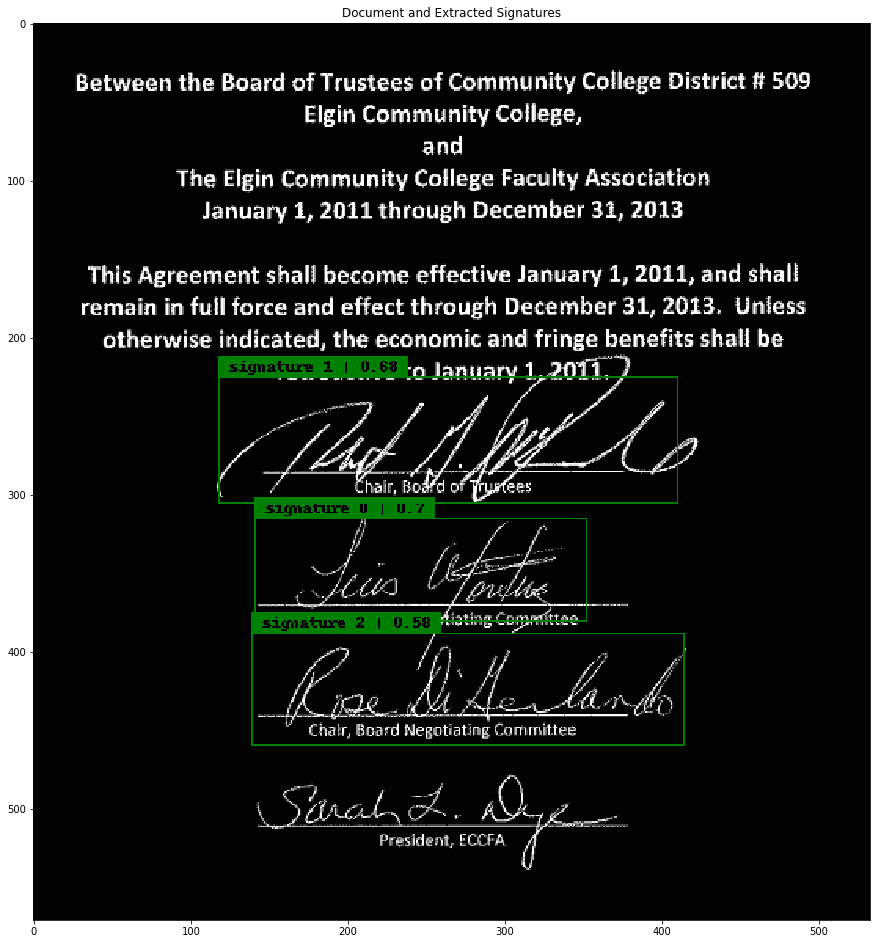

In [18]:
image_np = data_utils.img_to_np_array(img_path)
inverted_image_np = data_utils.invert_img(image_np) 

img_tensor = tf.convert_to_tensor(inverted_image_np)
img_tensor = img_tensor[tf.newaxis, ...]

boxes, scores, classes, detections = detector.detect(img_tensor)
annotated_image = visualize_boxes(inverted_image_np, boxes, scores, threshold=0.3, color="green")
plot_np_array(annotated_image, title="Document and Extracted Signatures")  